In [1]:
%matplotlib inline

In [2]:
from IPython.display import display

import numpy
from numpy import linspace
from sympy import lambdify, init_printing
from sympy import symbols, pi, sqrt, exp

from matplotlib import pyplot

init_printing()

# Logistic function

$$ S(x) = \frac{1}{1 + e^{-x}} = \frac{e^x}{e^x + 1} $$

# Normal distribution

$$ f(x | \mu, \sigma^2) = \frac{1}{\sqrt{2\pi \sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}} $$

- $\mu$ is the mean or expectation of the distribution
- $\sigma$ is the standard deviation
- $\sigma^2$ is the variance

# Likelihood ratio of two Normals with same variance

$$ f(x | \mu_0, \sigma^2) = \frac{1}{\sqrt{2\pi \sigma^2}} e^{-\frac{(x-\mu_0)^2}{2\sigma^2}} $$
$$ f(x | \mu_1, \sigma^2) = \frac{1}{\sqrt{2\pi \sigma^2}} e^{-\frac{(x-\mu_1)^2}{2\sigma^2}} $$

The likelihood ratio is

$$
\begin{align}
LR(x) =& \frac{f(x|\mu_0, \sigma^2)}{f(x|\mu_1, \sigma^2)} \\
      =& \frac{C exp[-\frac{(x-\mu_0)^2}{2\sigma^2}]}
      {C exp\left[-\frac{(x-\mu_1)^2}{2\sigma^2}\right]} \\
      =& exp\left[\frac{-(x-\mu_0)^2 + (x-\mu_1)^2}{2\sigma^2}\right] \\
      =& exp\left[\frac{-(x^2 + \mu_0^2 - 2\mu_0x) + (x^2 + \mu_1^2 - 2\mu_1x)}{2\sigma^2}\right] \\
      =& exp\left[\frac{-\mu_0^2 + 2\mu_0x + \mu_1^2 - 2\mu_1x}{2\sigma^2}\right] \\
      =& exp\left[\frac{2(\mu_0 - \mu_1)x  + \mu_1^2 - \mu_0^2}{2\sigma^2}\right] \\
      =& exp\left[\frac{2(\mu_0 - \mu_1)x - (\mu_0^2 - \mu_1^2)}{2\sigma^2}\right] \\
      =& exp\left[\frac{2(\mu_0 - \mu_1)x + (\mu_1 + \mu_0)(\mu_0 - \mu_1)}{2\sigma^2}\right] \\
      =& exp\left[\frac{(\mu_0 - \mu_1)(2x - (\mu_0 + \mu_1))}{2\sigma^2}\right] \\
      =& exp\left[\frac{(\mu_0 - \mu_1)}{\sigma^2}\left(x - \frac{(\mu_0 + \mu_1)}{2}\right)\right] \\
      =& exp\left[\gamma(x - m)\right] \\
\end{align}
$$

where

- $\gamma = \frac{(\mu_0 - \mu_1)}{\sigma^2}$ and
- $m = \frac{(\mu_0 + \mu_1)}{2}$

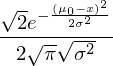

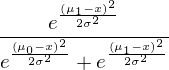

In [3]:
from sympy import simplify

x, mu0, mu1, sigma = symbols('x mu0 mu1 sigma')

pdf_normal_0 = (1/sqrt(2*pi*sigma**2))*exp(-((x-mu0)**2)/(2*sigma**2))
pdf_normal_1 = (1/sqrt(2*pi*sigma**2))*exp(-((x-mu1)**2)/(2*sigma**2))

display(simplify(pdf_normal_0))
display(simplify(pdf_normal_0/(pdf_normal_0 + pdf_normal_1)))

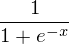

In [4]:
sigmoid = 1 / (1 + exp(-x))

display(sigmoid)

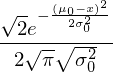

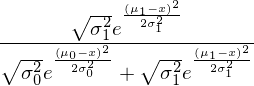

In [5]:
from sympy import simplify

x, mu_0, sigma_0, mu_1, sigma_1 = symbols('x mu_0 sigma_0 mu_1 sigma_1')

y_0 = (1/sqrt(2*pi*sigma_0**2))*exp(-((x-mu_0)**2)/(2*sigma_0**2))
y_1 = (1/sqrt(2*pi*sigma_1**2))*exp(-((x-mu_1)**2)/(2*sigma_1**2))

display(simplify(y_0))
display(simplify(y_0/(y_0 + y_1)))

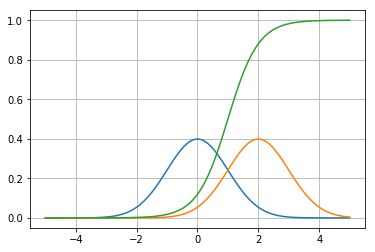

In [6]:
pdf_normal_0 = lambdify((x, mu_0, sigma_0), y_0, "numpy")
pdf_normal_1 = lambdify((x, mu_1, sigma_1), y_1, "numpy")


a = linspace(-5,5,100)
m0 = 0
s0 = 1
m1 = 2
s1 = 1

pyplot.plot(a, pdf_normal_0(a, m0, s0))
pyplot.plot(a, pdf_normal_1(a, m1, s1))
pyplot.plot(a, pdf_normal_0(a, m1, s1)/(pdf_normal_0(a, m0, s0) + pdf_normal_1(a, m1, s1)))
pyplot.grid(True)

# Expected brier score

Let's visualise the error space of a logistic regression with only one parameter $w$

$$  \frac{1}{1 + exp(-xw)} $$

(1.1224489795918373, 0.027041012195361747)


Text(1.5,0.1,'w = 1.12, BS = 0.03')

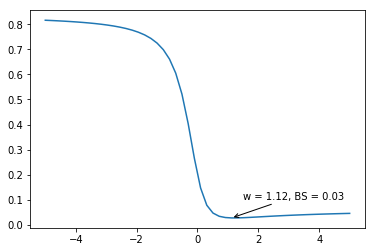

In [7]:
from numpy import exp as e

def brier_score(x1, x2):
    return numpy.mean((x1 - x2)**2)

w_list = linspace(-5, 5)
errors = []
for w in w_list:
    errors.append(brier_score(1/(1 + e(-a*w)), 
                              pdf_normal_0(a, m1, s1)/(pdf_normal_0(a, m0, s0) + pdf_normal_1(a, m1, s1))))
    
pyplot.plot(w_list, errors)
min_idx = numpy.argmin(errors)
print((w_list[min_idx], errors[min_idx]))
pyplot.annotate("w = {:.2f}, BS = {:.2f}".format(w_list[min_idx], errors[min_idx]), (w_list[min_idx], errors[min_idx]),
                (1.5, 0.1), arrowprops={'arrowstyle': '->'})